# Import Libraries & Load Data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

# reading CSV file and update dataframe. File is loaded on the same folder where python file

loan_df = pd.read_csv('loan.csv')

loan_df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,802401,1008051,35000,35000,35000.0000,36 months,14.65%,1305.19,F,F1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,737345,934508,35000,35000,34921.8011,36 months,14.65%,1302.69,G,G1,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN
2,741236,939091,35000,35000,35000.0000,36 months,14.65%,1295.21,E,E5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,872736,1086945,35000,35000,34975.0000,36 months,14.65%,1288.10,E,E4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,810107,999775,35000,35000,34975.0000,36 months,14.65%,1288.10,E,E4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
# Conclusion: 
# 111 columns: many places NaN values; need to drop such columns 
# Few columns to be formated like interest rate, term etc 

## CLEAN DATA

In [3]:
# drop the columns with all values as 'NA' 
loan_df = loan_df.dropna(axis='columns', how ='all')


# drop rows with loan status = current  
loan_df = loan_df[~(loan_df.loan_status == "Current")]



# make term column numeric by removing post-fix 'months' 
loan_df.term = loan_df.term.apply(lambda x: x.replace(" months", ""))
loan_df.term = loan_df.term.astype(int)

# define function to clean up emp_length column and derived continuous variable "emp_len" 
# where <= 1 yr is also considered 1 and >= 10 yrs considered 10

def clean_year(x):
    if ("10+ years" in x):
        return 10

    elif ("< 1 year" in x):
        return 1

    elif ("years" in x):
         return (x.replace("years",""))
             
    elif ("year" in x):
         return (x.replace("year",""))
        
    elif ("nan" in x):
         return 0
    
    else:
        return x
                

        # int_rate ... remove % sign 
loan_df['int_rate'] = loan_df.int_rate.apply(lambda x: x.replace("%", ""))
loan_df['int_rate'] = loan_df['int_rate'].astype("float")
loan_df['int_rate'].value_counts()

# review columns and data types
print(loan_df.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  int32  
 6   int_rate                    38577 non-null  float64
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [4]:
loan_df.emp_length = loan_df.emp_length.astype('str')
loan_df['emp_len'] = loan_df.emp_length.apply(clean_year)
loan_df.emp_len = loan_df.emp_len.astype('int')
loan_df.emp_len = loan_df.emp_len.sort_values()
print ("Job Duration in years:\n", loan_df.emp_len.value_counts())

Job Duration in years:
 10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_len, dtype: int64


In [5]:
# Conclusion:
# here <=1 year clubbed in 1 and all 10+ in 10 
# highest count for < 2 years and 10+ years employee length 

# Univariate Analysis

In [6]:

print ("\n Loan Status: \n", loan_df.loan_status.value_counts())
print ("\n Interest Rate: \n", loan_df.int_rate.value_counts())
print ("\n Loan Amount: \n", loan_df.loan_amnt.value_counts())
print ("\n Term:\n ", loan_df.term.value_counts())
print ("\n Grade: \n", loan_df.grade.value_counts())
print ("\n Home Ownership:\n ", loan_df.home_ownership.value_counts())
print ("\n Verification Status:\n ", loan_df.verification_status.value_counts())
print ("\n Payment Plan: \n", loan_df.pymnt_plan.value_counts())
print ("\n Purpose: \n", loan_df.purpose.value_counts())
print ("\n Customer Title:\n ", loan_df.title.value_counts())
print ("\n dti:\n ", loan_df.dti.describe())
print ("\n delinq_2yrs: ", loan_df.delinq_2yrs.value_counts())
print ("\n earliest_cr_line:\n ", loan_df.earliest_cr_line.value_counts())
print ("\n Number of derogatory public records: ", loan_df.pub_rec.describe())
print ("\n Total Accounts:\n ", loan_df.total_acc.value_counts())
print ("\n pub_rec_bankruptcies: ", loan_df.pub_rec_bankruptcies.value_counts())




 Loan Status: 
 Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

 Interest Rate: 
 14.65    38568
15.96        2
13.49        1
10.65        1
7.90         1
21.28        1
12.69        1
18.64        1
15.27        1
Name: int_rate, dtype: int64

 Loan Amount: 
 10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
27200       1
23525       1
4675        1
26850       1
18325       1
Name: loan_amnt, Length: 870, dtype: int64

 Term:
  36    29096
60     9481
Name: term, dtype: int64

 Grade: 
 B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

 Home Ownership:
  RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

 Verification Status:
  Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

 Payment Plan: 
 n    38577
Name: pymnt_plan, dtype: 

In [7]:
# Conclusion 
# Loan Status: 17% cases (5627/32950) are loan default 
# Interest RateL most of the loans with 14.65% interest rate
# Loan amount is wide speard and need to make it in buckets for better analysis 
# 7 Grades and loan request most in lower grades
# Home Ownership - majority with RENT and MORTGAGE
# Verificaton Status requests are spead across 3 categories
# Purpose:half of the loan requests for 'Dept Consolidation' 
# DTI: rangess from 0 to 30 with average 0.14
# delinq_2yrs: most cases with 0 
#pub_rec_bankruptcies: majorly '0' and few with '1' and exceptionally low for '2'

In [8]:
# checking client's annual income range 

loan_df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

## Derived Variables - Segmented Univariate Analysis

In [9]:
# function to create amount buckets 
def amt_bucket_func(x):
    if (x <= 50000):
        return 50
    elif (x <= 100000):
        return 100
    elif (x <= 200000):
        return 200
    elif (x <= 300000):
        return 300
    elif (x <= 400000):
        return 400
    elif (x <= 500000):
        return 500
    else:
        return 600
    
def loan_bucket_func(x):
    if (x <= 5000):
        return 5
    elif (x <= 10000):
        return 10
    elif (x <= 20000):
        return 20
    elif (x <= 30000):
        return 30
    elif (x <= 40000):
        return 40
    else:
        return 50
    
# new continuous variable added as 'income_b' to state income bucket like 50K to 600 K
loan_df['income_b'] = loan_df.annual_inc.apply(amt_bucket_func)
print ("client income buckets: \n", loan_df.income_b.value_counts())

# new continuous variable added as 'loan_amnt_b' to state loan amount bucket like 50K to 600 K
loan_df['loan_amnt_b'] = loan_df.loan_amnt.apply(loan_bucket_func)
print ("client loan amount buckets:\n ", loan_df.loan_amnt_b.value_counts())


# expected recovery is installment * term
loan_df['expected_recoveries'] = loan_df.installment * loan_df.term
loan_df.expected_recoveries.describe()



client income buckets: 
 100    17707
50     15389
200     4911
300      399
400       81
600       66
500       24
Name: income_b, dtype: int64
client loan amount buckets:
  10    12802
20    12032
5      9472
30     3536
40      735
Name: loan_amnt_b, dtype: int64


count    38577.000000
mean     13705.843014
std       9904.403378
min        564.840000
25%       6422.760000
50%      11199.960000
75%      18225.720000
max      60303.600000
Name: expected_recoveries, dtype: float64

In [10]:
# new segmented variable to understand profit & loss --- if value +ve then profit and -ve for loss
loan_df['P_L'] = (loan_df.total_pymnt - loan_df.loan_amnt)/loan_df.loan_amnt*100
loan_df['P_L'].describe()


count    38577.000000
mean         7.800553
std         27.305523
min       -100.000000
25%          6.962713
50%         13.902422
75%         21.042104
max         68.885204
Name: P_L, dtype: float64

In [11]:
# Conclusion:
# Below columns are derived and analysed individually 
# Annual income bucket (50 K – 400K)
# Loan Amount Bucket  (5 K – 40K) 
# P&L: (Total Payment – Loan Amount)/ Loan Amount 
# Expected Recoveries: Installment * Term


In [12]:
# create separate dataframes for Charged_off and fully_paid loans 

loan_df_CO = loan_df[loan_df.loan_status == "Charged Off"] #Charged_off loan records
loan_df_FP = loan_df[loan_df.loan_status == "Fully Paid"] #Fully Paid loan records



# Bivariate Analysis 

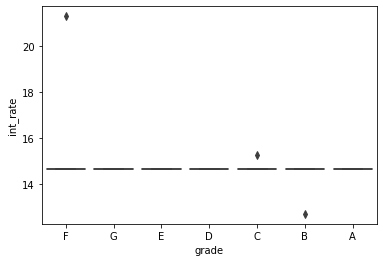

In [13]:
# Observe interest rate spread where defaulters 

sns.boxplot(x="grade", y= "int_rate", data=loan_df_CO)

plt.show()

In [14]:
# Conclusion:
# Flat 14.65% interest rate with very few exceptions    

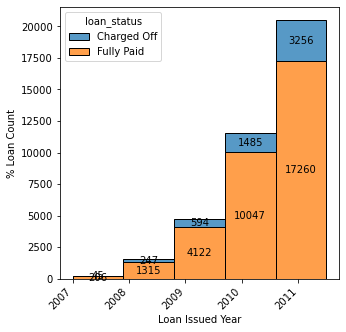

In [15]:
from datetime import datetime

date = datetime.strptime(loan_df['issue_d'][0], '%b-%y')
date.year

loan_df['issue_y'] = loan_df['issue_d'].apply(lambda x:datetime.strptime(x, '%b-%y').year)

%matplotlib inline

# derived variable as issue year 

plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# plot yearly loan counts as per loan status 
ax= sns.histplot(binwidth=0.9, x="issue_y", hue="loan_status", data=loan_df, stat="count",  multiple="stack")
ax.bar_label(ax.containers[0],  label_type='center', fontsize=10)
ax.bar_label(ax.containers[1],  label_type='center', fontsize=10)
plt.xlabel('Loan Issued Year')
plt.ylabel('% Loan Count')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [16]:
# Conclusion:
# Loan count is trending up but defaulter rate is consistent between 15% - 18% for last 3 years


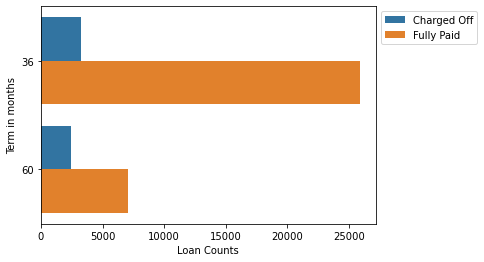

In [17]:
# plot term wise defaulters count 

sns.countplot(y ='term', hue = "loan_status", data = loan_df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.xlabel('Loan Counts')
plt.ylabel('Term in months')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [18]:
# Conclusion:
# 36 months loan term with better results than 60 months
# Better to offer more 36 months Term loans


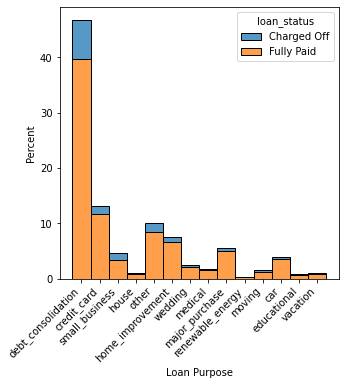

In [19]:
# plot bar chart to dipict loan purpose Vs loan status

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10  
)

# Purpose wise loan status counts 

sns.histplot(binwidth=0.9, x="purpose", hue="loan_status", data=loan_df, stat="percent", multiple="stack")
plt.xlabel('Loan Purpose')
plt.show()

In [20]:
# Conclusion:
# Below loan purpose categories to be handled cautiously as % defaulters are higher side 
# Dept Consolidation
# Credit Card
# Small Business 
# Highest % defaulters are in Small Business Category


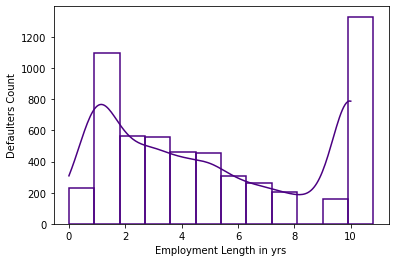

In [21]:

# client employment length Vs defaulters count 
# defaulters are trending down as employment length is increasing till 8 years but 10+ years again major defaulter risk

loan_df.emp_len = loan_df.emp_len.sort_values()
sns.histplot(binwidth=0.9, x="emp_len", data=loan_df_CO, stat="count", multiple="stack", kde=True, fill= False, color='indigo')
plt.ylabel('Defaulters Count')
plt.xlabel('Employment Length in yrs')
plt.show()

In [22]:
# Conclusion:
# Employment length < 2 yrs & 10+ years to be watched as deflater peaks 


[]

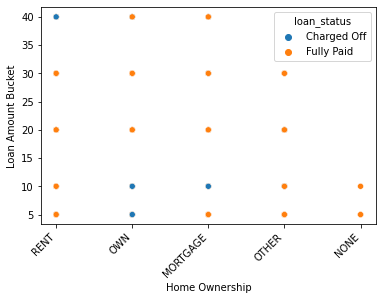

In [23]:
# Scatter Plot to see loan status distrubution across home ownership categories

fig, ax = plt.subplots()
sns.scatterplot(x="home_ownership", y= 'loan_amnt_b', hue= 'loan_status', data=loan_df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize= 10  
)
plt.xlabel("Home Ownership")
plt.ylabel("Loan Amount Bucket")

plt.plot()


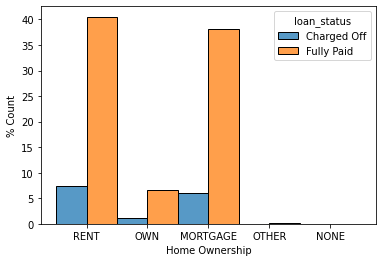

In [24]:
# home ownership 

sns.histplot(binwidth=1, x="home_ownership", hue="loan_status", data=loan_df, stat="percent", multiple="dodge")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Home Ownership")
plt.ylabel("% Count")


plt.show()

In [25]:
# Conclusion:
# % Defaulters high in case of Rent & Mortgage
# In case of Rent, defaulters with top loan amount bucket
# Reduce providing loans as well as reduce loan amount for Rent category 


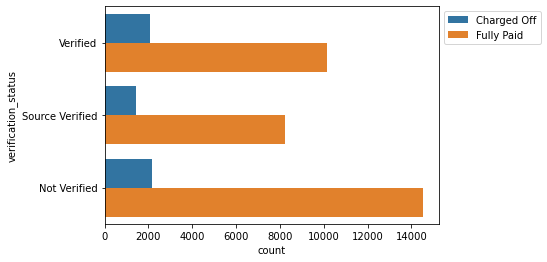

In [26]:
#  Watch defaulter rate across verification statues   
sns.countplot(y ='verification_status', hue = "loan_status", data = loan_df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [27]:
# Conclusion: Surprisingly defaulter rate is lower in 'Not Verified' state compare to 'Verified' & 'Source Verified'
#Let's do analysis together on verification status & income bucket 

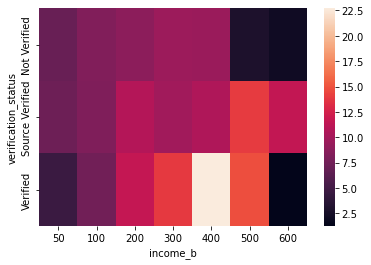

In [28]:
#  Watch profit & loss for Grades & Loan Amount buckets  

res = pd.pivot_table(data= loan_df, index="verification_status", columns="income_b", values="P_L", aggfunc="mean")
sns.heatmap(res)
# ax.bar_label(ax.containers, label_type='center')
plt.show()

In [29]:
#No major losses when source was verified. Better to mandate verification & source verification process 

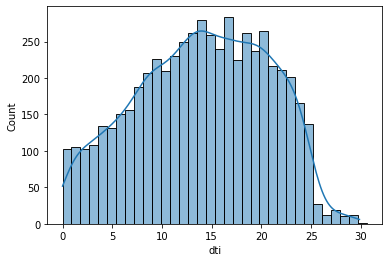

In [30]:
# watch DTI Vs defaulters count 
sns.histplot(binwidth=0.9, x="dti", data=loan_df_CO, stat="count", multiple="stack", kde=True)

plt.show()

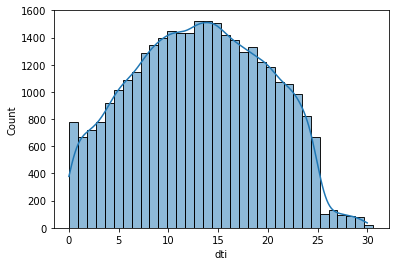

In [31]:
# watch dti Vs fully paid counts 

sns.histplot(binwidth=0.9, x="dti", data=loan_df_FP, stat="count", multiple="stack", kde=True)

plt.show()

In [32]:
#Conclusion:
# Defaulter (loan status = “Charged Off”) count is trending up with DTI value
# Peaks observed DTI > 14; securitize deep for these loan requests 


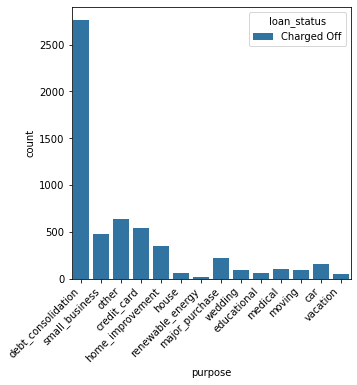

In [33]:
# observe defaulters count across loan Purpose categories 
plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10 
)
sns.countplot(data=loan_df_CO, x= 'purpose', hue='loan_status')
plt.show()

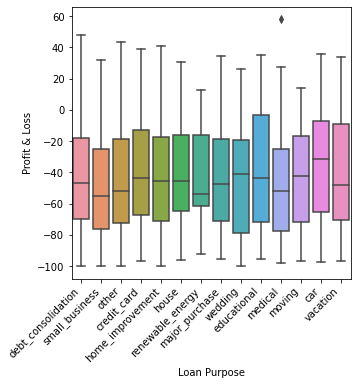

In [34]:
#  Profit & Loss across pupose categories 

plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10  
)

sns.boxplot(x="purpose", y= "P_L", data=loan_df_CO)
plt.xlabel("Loan Purpose")
plt.ylabel("Profit & Loss")
plt.show()


In [35]:
# Conclusion:
# 2 loan purpose categories – ‘Debt Consolidation’ & ‘Small Business’ with highest defaulters 
# 2 industries – ‘Small Business’ & ‘Renewable Energy’ with maximum average loss   


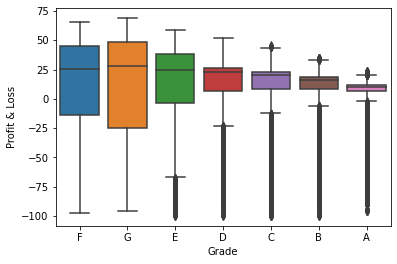

In [36]:
#grade wise defaulter Profit & Loss %

sns.boxplot(x="grade", y= "P_L", data=loan_df)

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.ylabel("Profit & Loss")
plt.xlabel("Grade")
plt.show()

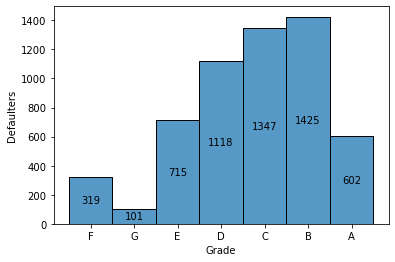

In [37]:
# grade wise defaulters count 
ax = sns.histplot(binwidth=0.9, x="grade", data=loan_df_CO, stat="count", multiple="stack")

ax.bar_label(ax.containers[0], label_type='center')

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Grade")
plt.ylabel("Defaulters")

plt.show()


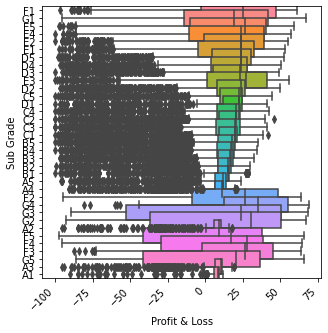

In [38]:
#sub grade wise defaulter Profit & Loss %

plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

sns.boxplot(y="sub_grade", x= "P_L", data=loan_df, saturation=2, width=2, dodge=True, fliersize=5)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Profit & Loss")
plt.ylabel("Sub Grade")
plt.show()

In [39]:
# Conclusion: Grade: profit improves as grade upscale, but high risk with lower grades  
# Sub Grade: heavy loss making cases for middle sub grades though major cases are profit making
# Initial sub grades are with wide spread across loss and profit scale and to be reveiwed closely   


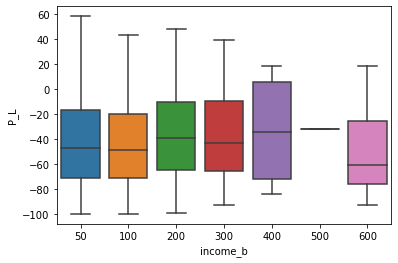

In [40]:
# boxplot to see profit & loss spread across income buckets 

sns.boxplot(data=loan_df_CO, x= 'income_b', y= 'P_L')
plt.show()



In [41]:
# considering above stats as > 500K income bucket with major loss. 
# Check which are these records and if any clear drivers can be indentified  
loan_df[(loan_df.income_b> 500) & (loan_df.P_L<0)].head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_len,income_b,loan_amnt_b,expected_recoveries,P_L,issue_y
758,473872,599220,24000,24000,23700.000000,36,14.65,872.88,F,F2,...,0.0,0,0.0,0.0,4,600,30,31423.68,-92.744333,2010
1618,1050329,1281759,30000,30000,30000.000000,60,14.65,799.84,E,E5,...,0.0,0,0.0,0.0,1,600,30,47990.40,-80.731933,2011
1679,157169,157162,25000,25000,499.999401,36,14.65,795.11,B,B2,...,0.0,0,NaN,0.0,10,600,30,28623.96,-58.554680,2007
2803,447920,549060,20000,20000,19989.416070,36,14.65,682.74,C,C4,...,0.0,0,0.0,0.0,4,600,20,24578.64,-7.833600,2009
4571,600335,757402,18000,18000,17544.410000,36,14.65,590.33,B,B3,...,0.0,0,0.0,0.0,4,600,20,21251.88,-60.649278,2010
10386,514680,665304,12000,12000,10735.480000,36,14.65,417.93,D,D3,...,0.0,0,0.0,0.0,10,600,20,15045.48,-65.192500,2010
13906,508436,656013,10000,10000,10000.000000,36,14.65,357.47,E,E3,...,0.0,0,0.0,0.0,6,600,10,12868.92,-42.819200,2010
15592,519954,672152,25000,15500,11430.000820,60,14.65,334.08,B,B3,...,0.0,0,0.0,0.0,3,600,30,20044.80,-19.821520,2010
17263,518788,670637,12000,9700,9060.492229,36,14.65,314.14,B,B2,...,0.0,0,0.0,0.0,3,600,20,11309.04,-5.755976,2010
33139,581917,747923,6000,6000,5975.000000,60,14.65,131.93,B,B4,...,0.0,0,0.0,0.0,5,600,10,7915.80,-89.035167,2010


In [42]:
# High loss recorded with income > 500K but no clear themes or corelation for these cases  

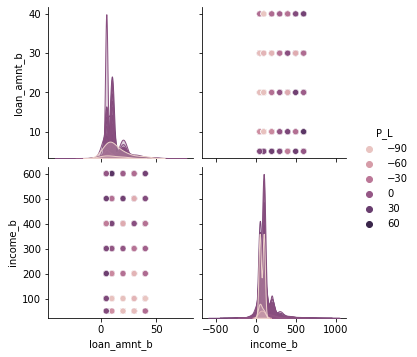

In [43]:
# how income bucket and loan amount drive profit & loss 

sns.pairplot(loan_df[[ 'P_L', 'loan_amnt_b', 'income_b']], hue='P_L')
plt.show()


In [44]:
# Conclusion: Income < 200K & loan amount between 15K to 40K to be scrutinized to mitigate risks or take measures 
# like  increase interest rate to have better recovery


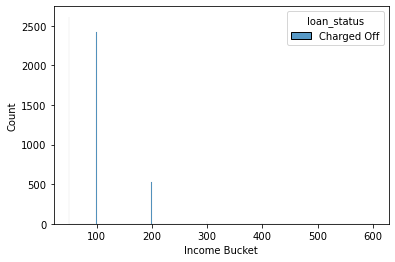

In [45]:
# Defaulters count across income buckets 

sns.histplot(binwidth=0.9, x="income_b", hue="loan_status", data=loan_df_CO, stat="count", multiple="dodge")
plt.xlabel('Income Bucket')
plt.show()


In [46]:
# Conclusion: Most defaulters with income < 200 K

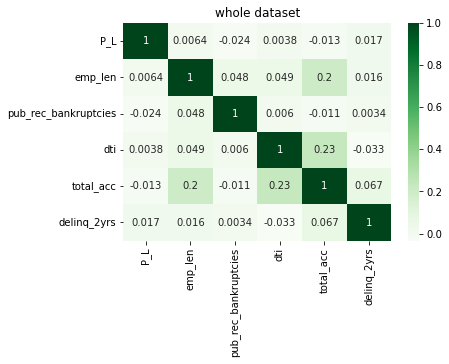

In [47]:
# Check corelation between 'P_L','emp_len','pub_rec_bankruptcies',  'dti', 'total_acc', 'delinq_2yrs' on overall data set 

df_whole = loan_df[['P_L','emp_len','pub_rec_bankruptcies',  'dti', 'total_acc', 'delinq_2yrs']]
whole_corr = df_whole.corr()
plt.title ("whole dataset")
sns.heatmap(whole_corr, cmap="Greens", annot=True)
plt.show()


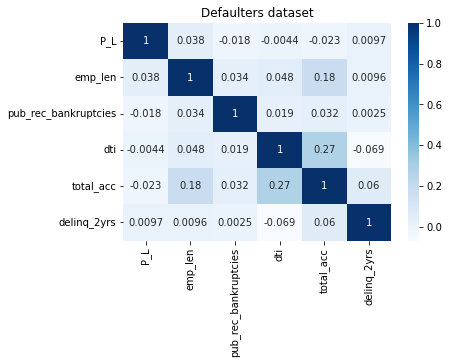

In [48]:
# Check corelation between 'P_L','emp_len','pub_rec_bankruptcies',  'dti', 'total_acc', 'delinq_2yrs' on defaulters data set 

df_CO = loan_df_CO[['P_L','emp_len','pub_rec_bankruptcies',  'dti', 'total_acc', 'delinq_2yrs']]

CO_corr = df_CO.corr()
plt.title ("Defaulters dataset")
sns.heatmap(CO_corr, cmap="Blues", annot=True)
plt.show()

In [49]:
# Conclusion: Overall not very strong corelation but certainly employee length is positively impacting whereas below 3 drivers for loss making 
# (1) Public Records (Bankruptcies)
# (2) DTI
# (3) Number of Bank Accounts 


0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


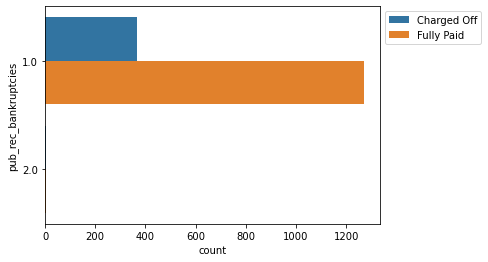

In [50]:
# pub_rec_bankruptcies .... excluding 0 for plotting to get clear view with values 1 & 2 

print (loan_df.pub_rec_bankruptcies.value_counts())
              
sns.countplot(y ='pub_rec_bankruptcies', hue = "loan_status", data = loan_df[loan_df.pub_rec_bankruptcies>0])
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [51]:
# Conclusion: 30% defaulters when Pub Rec is '1'. Need to put stringent validations 

## Top View on Profit & Loss   

In [52]:
Total_Exp_Rec = loan_df.expected_recoveries.sum()
Total_Rec = loan_df.total_pymnt.sum()
Total_Loan_Amt = loan_df.loan_amnt.sum()
Overall_Planned_Profit_Perc = (Total_Exp_Rec-Total_Loan_Amt)/ Total_Loan_Amt*100
Overall_Actual_Profit_Perc = (Total_Rec-Total_Loan_Amt)/ Total_Loan_Amt*100

print ("\nTotal Loan amount = ", Total_Loan_Amt.round(0) )
print ("Total Planned Recovery =", Total_Exp_Rec.round(0) )
print ("Total Actual Recovery =", Total_Rec.round(0) )
print ("%Overall Planned Profit = ", Overall_Planned_Profit_Perc.round(0))
print ("%Overall Actual Profit = ", Overall_Actual_Profit_Perc.round(0))



Fully_Paid_Loan_Amt = loan_df[loan_df.loan_status == "Fully Paid"].loan_amnt.sum().round(0) 
Fully_Paid_Exp_Rec = loan_df[loan_df.loan_status == "Fully Paid"].expected_recoveries.sum().round(0)
Fully_Paid_Rec = loan_df[loan_df.loan_status == "Fully Paid"].total_pymnt.sum().round(0)
Fully_Paid_Planned_Profit_Perc = (Fully_Paid_Exp_Rec - Fully_Paid_Loan_Amt)/Fully_Paid_Loan_Amt*100
Fully_Paid_Actual_Profit_Perc = (Fully_Paid_Rec - Fully_Paid_Loan_Amt)/Fully_Paid_Loan_Amt*100

print ("\nTotal Planned Recovery for Fully-Paid loans", Fully_Paid_Exp_Rec )
print ("Total Actual Recovery for Fully-Paid loans =", Fully_Paid_Rec)
print ("%Planned Profit on Fully-Paid loans =", Fully_Paid_Planned_Profit_Perc.round(0) )
print ("%Actual Profit on Fully-Paid loans =", Fully_Paid_Actual_Profit_Perc.round(0))


Charged_Off_Loan_Amt = loan_df[loan_df.loan_status == "Charged Off"].loan_amnt.sum().round(0)
Charged_Off_Exp_Rec = loan_df[loan_df.loan_status == "Charged Off"].expected_recoveries.sum().round(0)
Charged_Off_Rec = loan_df[loan_df.loan_status == "Charged Off"].total_pymnt.sum().round(0)
Charged_Off_Loss_perc = (Charged_Off_Loan_Amt - Charged_Off_Rec)/Charged_Off_Loan_Amt*100

print ("\nTotal Planned Recovery for Charged-Off loans", Charged_Off_Exp_Rec )
print ("Total Actual Recovery for Charged-Off loans =", Charged_Off_Rec)
print ("%Actual Loss on Charged-Off loans =", Charged_Off_Loss_perc.round(0))


Total Loan amount =  426161100
Total Planned Recovery = 528730306.0
Total Actual Recovery = 457792116.0
%Overall Planned Profit =  24.0
%Overall Actual Profit =  7.0

Total Planned Recovery for Fully-Paid loans 439321840.0
Total Actual Recovery for Fully-Paid loans = 419314516.0
%Planned Profit on Fully-Paid loans = 23.0
%Actual Profit on Fully-Paid loans = 17.0

Total Planned Recovery for Charged-Off loans 89408466.0
Total Actual Recovery for Charged-Off loans = 38477600.0
%Actual Loss on Charged-Off loans = 44.0


In [53]:
# Conclusion:44% Loss in defaulter cases which drastically reducing overall profit to the company 
# and urgent need to take corrective/preventive actions 


# End of coding 